Essay Grading 
<br> Ujian Akhir Semester
1. Mata Kuliah : Rekayasa Data Terapan
2. Nama        : Suryadi
3. NPM         : 1706071245

Keterangan : Code untuk import gdrive bisa dihapus saja

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Kuliah/RekayasaDataTerapan/UAS

/content/drive/MyDrive/Kuliah/RekayasaDataTerapan/UAS


step mengolah data NLP (Natural Language Processing) untuk implementasi program python 
1. Import Library (beberapa library sangat membantu mengolah data seperti pandas dataframe)
2. Load Data pada Python (memasukkan data pada compiler python untuk dilakukan proses pengolahan data NLP)
3. Preprocessing Data (Pengolahan data awal sebelum diolah oleh machine learning agar proses pembelajaran lebih baik)
4. Feature Extraction (proses ekstraksi informasi yang dimiliki oleh data yang sangat membantu proses klasifikasi NLP)
5. Splitting Data (proses pembagian data training dan data testing untuk kebutuhan pembelajaran dan pengetesan machine leanrning)
6. Building Model Regressor (Pemilihan algoritma regressor yang digunakan untuk penyelesaian problem klasifikasi dan proses pembuatan model dengan fitting antara feature dan class)
7. Evaluasi Model (Hasil Analisis dari data yang didapatkan melalui pembangunan model pada proses klasifikasi apakah hasilnya akurat untuk problem regresi dengan melihat parameter mse dan hasil data test dan data prediksi. jika hasil tidak memuaskan maka dapat menggunakan algoritma regressor yang lain)


Perbedaan utama pada essay grading terletak pada Feature Extraction dimana penggunaan word embedding (pengubahan kata menjadi vektor) seperti word2vec. Tetapi penggunaan word2vec ini tidak bisa di implementasikan pada google collab karena proses download corpus yang sangat besar lebih dari 5 Gb sehingga saya menggunakan TF-IDF. Perbedaan paling besar dari TF-IDF dan word2vec adalah TF-IDF sangat sensitif terhadap perubahan kata sedangkan word2vec sangat memperhatikan hubungan kata dan sinonim dari kata tersebut.

Block Diagram Essay Grading



In [ ]:
!gdown --id 1UvBZ3yftBU5ki8M5BzxqmJrsQlFcHGp0

Downloading...
From: https://drive.google.com/uc?id=1UvBZ3yftBU5ki8M5BzxqmJrsQlFcHGp0
To: /content/Diagram UAS.png
100% 57.9k/57.9k [00:00<00:00, 3.69MB/s]


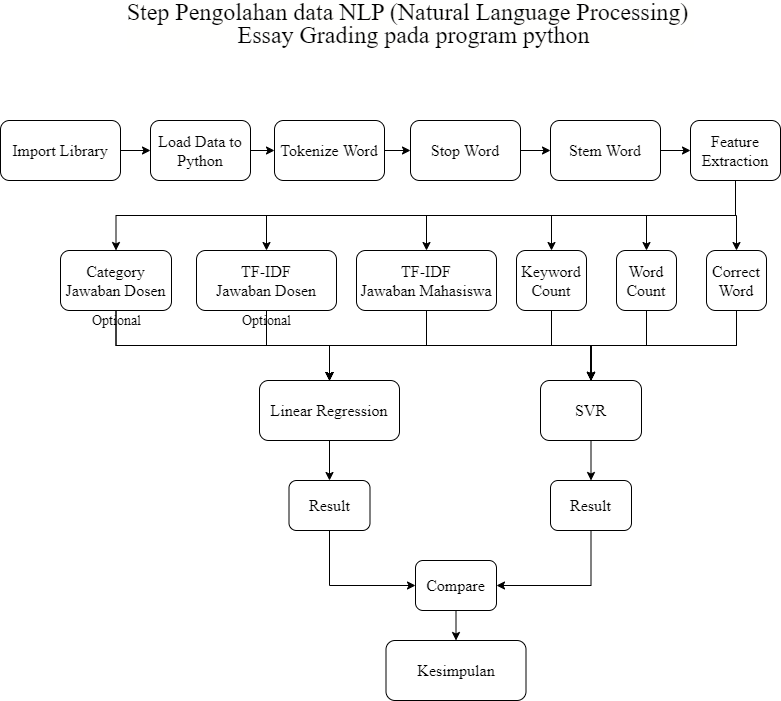

In [ ]:
from IPython.display import Image
Image('Diagram UAS.png')

In [ ]:
# import library
import numpy as np
import re
from google.colab import files 
import io 
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install fasttext
from gensim.models.fasttext import FastText
import fasttext.util
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, InputLayer, TimeDistributed
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Upload data Essay Grading dalam bentuk csv pada python

In [ ]:
#upload data ke python
#menyimpan data ke format dataframe
data = pd.read_csv(io.BytesIO(files.upload()['dataset_esay grading.csv']))
#extract information about data type and size
data

Saving dataset_esay grading.csv to dataset_esay grading.csv


,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled
0,komputer menggunakan layanan tersedia jaringan,client server jaringan komputer model komunika...,20,0.2
1,fundamental centralized infrastructure,client server jaringan komputer model komunika...,20,0.2
2,hubungan komponen jaringan berkomunikasi,client server jaringan komputer model komunika...,30,0.3
3,client server jaringan komunikasi client serve...,client server jaringan komputer model komunika...,40,0.4
4,client server jaringan 2 buah cliet 1 server s...,client server jaringan komputer model komunika...,40,0.4
...,...,...,...,...
215,turbo boost sistem diberikan produsen prosesor...,turbo boost salah satu fitur prosesor masa ber...,70,0.7
216,turbo boost mempercepat kinerja processor memi...,turbo boost salah satu fitur prosesor masa ber...,80,0.8
217,turbo boost kondisi dimana terjadi penambahan ...,turbo boost salah satu fitur prosesor masa ber...,60,0.6
218,turbo boost fitur prosesor untuk meningkatkan ...,turbo boost salah satu fitur prosesor masa ber...,80,0.8


In [ ]:
#Banyak data per kategori jawaban dosen
data['jawaban_dosen'].astype('category').cat.codes.value_counts()

3    55
2    55
1    55
0    55
dtype: int64

In [ ]:
#Statistik dari human grading
data['human_rater_scaled'].describe()

count    220.000000
mean       0.753591
std        0.243136
min        0.000000
25%        0.600000
50%        0.800000
75%        1.000000
max        1.000000
Name: human_rater_scaled, dtype: float64

Preprocessing data (proses tokenize word, stop word, stemming)
1. tokenize word = pemisahan setiap kata
2. stop word = menghapus kata sambung yang tidak memiliki arti seperti di,ke,dll)
3. stemming = menghapus kata imbuhan

In [ ]:
#Preprocessing_data
preprocessing_data = data.copy()
#Tokenize word
preprocessing_data["jawaban_mahasiswa"] = preprocessing_data["jawaban_mahasiswa"].apply(nltk.word_tokenize)
preprocessing_data["jawaban_dosen"] = preprocessing_data["jawaban_dosen"].apply(nltk.word_tokenize)
#Stopword
preprocessing_data["jawaban_mahasiswa"] = preprocessing_data["jawaban_mahasiswa"].apply(lambda x: [item for item in x if item not in stopwords.words('indonesian')])
preprocessing_data["jawaban_dosen"] = preprocessing_data["jawaban_dosen"].apply(lambda x: [item for item in x if item not in stopwords.words('indonesian')])
#Stemming Bahasa Indonesia
stem_indo = StemmerFactory().create_stemmer()
for i in range(len(preprocessing_data["jawaban_mahasiswa"])):
  for j in range(len(preprocessing_data["jawaban_mahasiswa"][i])):
    preprocessing_data["jawaban_mahasiswa"][i][j] = stem_indo.stem(preprocessing_data["jawaban_mahasiswa"][i][j])
for k in range(len(preprocessing_data["jawaban_dosen"])):
  for l in range(len(preprocessing_data["jawaban_dosen"][k])):
    preprocessing_data["jawaban_dosen"][k][l] = stem_indo.stem(preprocessing_data["jawaban_dosen"][k][l])
#Stemming Bahasa Inggris
#preprocessing_data["jawaban_mahasiswa"] = preprocessing_data["jawaban_mahasiswa"].apply(lambda x: [PorterStemmer().stem(y) for y in x])
#preprocessing_data["jawaban_dosen"] = preprocessing_data["jawaban_dosen"].apply(lambda x: [PorterStemmer().stem(y) for y in x])
preprocessing_data

,jawaban_mahasiswa,jawaban_dosen,human_rater,human_rater_scaled
0,"[komputer, layan, sedia, jaring]","[client, server, jaring, komputer, model, komu...",20,0.2
1,"[fundamental, centralized, infrastructure]","[client, server, jaring, komputer, model, komu...",20,0.2
2,"[hubung, komponen, jaring, komunikasi]","[client, server, jaring, komputer, model, komu...",30,0.3
3,"[client, server, jaring, komunikasi, client, s...","[client, server, jaring, komputer, model, komu...",40,0.4
4,"[client, server, jaring, 2, buah, cliet, 1, se...","[client, server, jaring, komputer, model, komu...",40,0.4
...,...,...,...,...
215,"[turbo, boost, sistem, produsen, prosesor, tin...","[turbo, boost, salah, fitur, prosesor, tuju, c...",70,0.7
216,"[turbo, boost, cepat, kerja, processor, milik,...","[turbo, boost, salah, fitur, prosesor, tuju, c...",80,0.8
217,"[turbo, boost, kondisi, mana, tambah, cepat, p...","[turbo, boost, salah, fitur, prosesor, tuju, c...",60,0.6
218,"[turbo, boost, fitur, prosesor, tingkat, kerja...","[turbo, boost, salah, fitur, prosesor, tuju, c...",80,0.8


Proses printing data training dan data testing

In [ ]:
#print data train dan test ke format csv
data_input_train,data_input_test,data_output_train,data_output_test = train_test_split(preprocessing_data[["jawaban_mahasiswa","jawaban_dosen"]],preprocessing_data[["human_rater","human_rater_scaled"]],test_size=0.2)
data_train = pd.concat([data_input_train,data_output_train],axis=1)
data_test = pd.concat([data_input_test,data_output_test],axis=1)
data_train.to_csv('dataset_essay_grading_train.csv')
data_test.to_csv('dataset_essay_grading_test.csv')

word2vec dan fasttext memiliki corpus dengan file yang sangat besar sehingga tidak dapat digunakan sebagai feature extraction

In [ ]:
#Keterangan : proses ini memakan waktu yang lama mohon bersabar
#word_embedding dengan library fasttext
#fasttext.util.download_model('id', if_exists='ignore')
#ft_model = FastText.load_fasttext_format('cc.id.300.bin')

Feature Extraction
1. TF-IDF Jawaban Mahasiswa
2. TF-IDF Jawaban Dosen
3. Correct word = kata pada jawaban mahasiswa yang sama dengan kata kunci pada jawaban dosen
4. Word Count = jumlah kata pada jawaban mahasiswa
5. Keyword Count = jumlah kata kunci pada jawaban dosen

In [ ]:
#feature extraction
correct_word = np.zeros((len(preprocessing_data["jawaban_mahasiswa"]),1))
for m in range(len(preprocessing_data["jawaban_mahasiswa"])):
  for n in range(len(preprocessing_data["jawaban_mahasiswa"][m])):
      for p in range(len(preprocessing_data["jawaban_dosen"][m])):
        if preprocessing_data["jawaban_mahasiswa"][m][n] == preprocessing_data["jawaban_dosen"][m][p]:
          correct_word[m] = correct_word[m] + 1
          break
wordcount = np.zeros((len(preprocessing_data["jawaban_mahasiswa"]),1))
for q in range(len(preprocessing_data["jawaban_mahasiswa"])):
  wordcount[q] = len(preprocessing_data["jawaban_mahasiswa"][q])
keywordcount = np.zeros((len(preprocessing_data["jawaban_dosen"]),1))
for z in range(len(preprocessing_data["jawaban_dosen"])):
  keywordcount[z] = len(preprocessing_data["jawaban_dosen"][z])
# feature extraction with TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_jawaban_mahasiswa = tfidf_vectorizer.fit_transform(preprocessing_data["jawaban_mahasiswa"].apply(' '.join)).toarray()
tfidf_jawaban_dosen = tfidf_vectorizer.fit_transform(preprocessing_data["jawaban_dosen"].apply(' '.join)).toarray()

feature_extraction = pd.DataFrame(correct_word,columns=['correct_word'])
feature_extraction['word_count'] = wordcount
feature_extraction['keyword_count'] = keywordcount
#feature_extraction['category_soal'] = preprocessing_data["jawaban_dosen"].apply(' '.join).astype('category').cat.codes
feature_extraction

,correct_word,word_count,keyword_count
0,4.0,4.0,22.0
1,0.0,3.0,22.0
2,2.0,4.0,22.0
3,15.0,22.0,22.0
4,5.0,9.0,22.0
...,...,...,...
215,7.0,11.0,57.0
216,5.0,8.0,57.0
217,7.0,10.0,57.0
218,13.0,14.0,57.0


Pemisahan data training dan data testing dengan rasio 80% training dan 20% testing. 

In [ ]:
#memisahkan data training dan data testing
#x = np.concatenate((feature_extraction.to_numpy(), tfidf_jawaban_mahasiswa, tfidf_jawaban_dosen), axis = 1)
x = np.concatenate((feature_extraction.to_numpy(), tfidf_jawaban_mahasiswa), axis = 1)
#x = feature_extraction.to_numpy()
#y = preprocessing_data["human_rater"].to_numpy()
y = preprocessing_data["human_rater_scaled"].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Proses building model NN untuk NLP Essay Grading
1. Linear Regressor
2. Epsilon-Support Vector Regression (SVR)

In [ ]:
#linear regressor
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)
y_pred = linear_regressor.predict(x_test)
print("Mean squared error: %f" % mean_squared_error(y_test, y_pred))
Data_LR = pd.DataFrame(np.column_stack((y_test,y_pred)),columns=["Test","Prediction"])
Data_LR

Mean squared error: 0.053315


,Test,Prediction
0,0.30,0.329771
1,0.10,0.534355
2,0.79,0.754084
3,0.90,0.714468
4,0.80,1.085544
5,0.80,0.707614
6,0.80,0.887266
7,1.00,0.857903
8,1.00,1.182281
9,0.80,0.639357


In [ ]:
Data_LR["Prediction"].describe()

count    44.000000
mean      0.780593
std       0.217251
min       0.329771
25%       0.681610
50%       0.775939
75%       0.892714
max       1.281548
Name: Prediction, dtype: float64

<function matplotlib.pyplot.show>

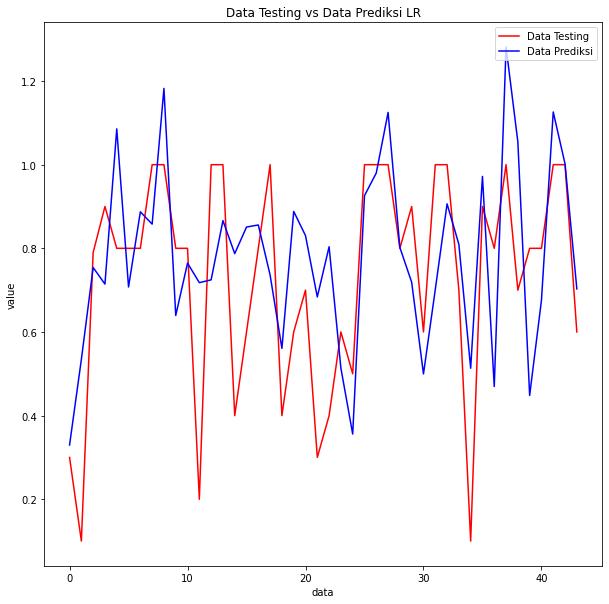

In [ ]:
#grafik data prediksi dan data testing
plt.figure(figsize=(10,10))
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
plt.xlabel('data')
plt.ylabel('value')
plt.title('Data Testing vs Data Prediksi LR')
plt.legend(['Data Testing','Data Prediksi'],loc='upper right')
plt.show

In [ ]:
#Epsilon-Support Vector Regression (SVR)
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Mean squared error:%f" % mean_squared_error(y_test,y_pred))
Data_SVR = pd.DataFrame(np.column_stack((y_test,y_pred)),columns=["Test","Prediction"])
Data_SVR

Mean squared error:0.045356


,Test,Prediction
0,0.30,0.465848
1,0.10,0.718051
2,0.79,0.712055
3,0.90,0.769348
4,0.80,0.830043
5,0.80,0.786969
6,0.80,0.778947
7,1.00,0.747929
8,1.00,0.814940
9,0.80,0.819481


In [ ]:
Data_SVR["Prediction"].describe()

count    44.000000
mean      0.741290
std       0.108423
min       0.465848
25%       0.678520
50%       0.783830
75%       0.819303
max       0.869526
Name: Prediction, dtype: float64

<function matplotlib.pyplot.show>

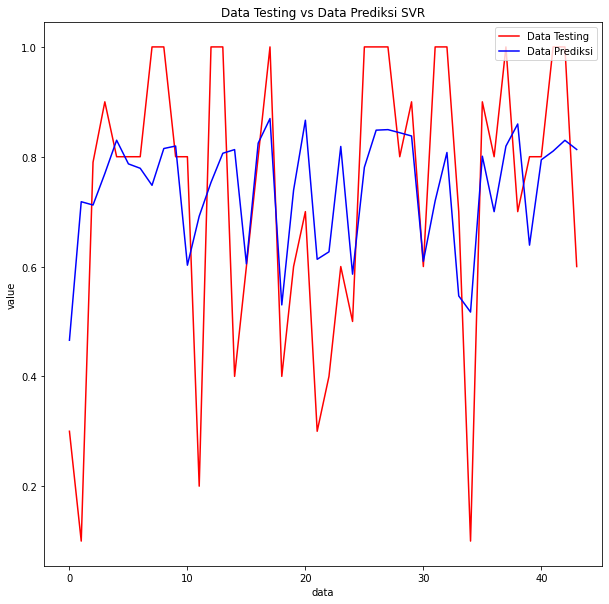

In [ ]:
#grafik data prediksi dan data testing data SVR
plt.figure(figsize=(10,10))
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
plt.xlabel('data')
plt.ylabel('value')
plt.title('Data Testing vs Data Prediksi SVR')
plt.legend(['Data Testing','Data Prediksi'],loc='upper right')
plt.show

Kesimpulan
1. Data tidak dapat ditampilkan pada confusion matrix karena Essay grading tidak menggunakan classifier tetapi menggunakan regressor
2. Parmeter keberhasilan dihitung dari mean squared error (MSE) karena regressor disini berperan untuk memprediksi bukan untuk klasifikasi antara kelas sehingga keakuratan nilai prediksi diperhitungkan
3. Parameter MSE menunjukkan Linear Regressor lebih baik dibandingkan SVR untuk essay grading karena Linear Regressor lebih baik untuk data yang feature structured
4. Kedua parameter MSE berkisar antara angka 10^-2 (besar) sehingga performa essay grading tidak baik. Hal ini dikarenakan penggunaan feature extraction TF-IDF yang sangat sensitif terhadap perubahan kata dan frekuensi kata.

Referensi
1. Liu, J., Xu, Y., & Zhu, Y. (n.d.). Automated Essay Scoring based on Two-Stage Learning. 1–7.
2. Aji, R. B., Baizal, Z. K. A., Firdaus, Y., Abdurrahman, Z. K., Ssi, B., Kom, M., & Firdaus, Y. (2011). Automatic Essay Grading System Menggunakan Metode Latent Semantic Analysis. Jurnal Inovasi Dan Kewirausahaan, 2011(Snati), 17–18.
3. Song, S., & Zhao, J. (2012). Automated Essay Scoring Using Machine Learning. 3–7.
4. Li, Y., & Yan, Y. (2012). An effective automated essay scoring system using support vector regression. Proceedings - 2012 5th International Conference on Intelligent Computation Technology and Automation, ICICTA 2012, 65–68.